In [308]:
# python version: 3.8.11

import sys
sys.path.append('..')


In [309]:
import pandas as pd
import matplotlib


In [310]:
# df = pd.read_csv(
#     "../datasets/person/AppleWatch - HeartRate StepCount etc 8440 rows - analysis.csv")

df = pd.read_csv(
    "../datasets/person/AppleWatch - HeartRate StepCount etc 92406 rows - export20200620105726.csv",
    low_memory=False
)

df.head(10)


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value
0,HKQuantityTypeIdentifierHeight,ヘルスケア,10.1.1,cm,2016-12-25 13:07:19 +0900,2016-12-25 13:07:19 +0900,2016-12-25 13:07:19 +0900,183
1,HKQuantityTypeIdentifierBodyMass,ヘルスケア,10.1.1,kg,2016-12-25 13:07:19 +0900,2016-12-25 13:07:19 +0900,2016-12-25 13:07:19 +0900,85
2,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 02:50:42 +0900,2020-06-13 02:50:23 +0900,2020-06-13 02:50:23 +0900,79.5536
3,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 02:55:24 +0900,2020-06-13 02:55:10 +0900,2020-06-13 02:55:10 +0900,81
4,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 03:01:15 +0900,2020-06-13 02:57:08 +0900,2020-06-13 02:57:08 +0900,85
5,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 03:06:23 +0900,2020-06-13 03:02:43 +0900,2020-06-13 03:02:43 +0900,89
6,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 03:12:22 +0900,2020-06-13 03:08:34 +0900,2020-06-13 03:08:34 +0900,89
7,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 03:16:02 +0900,2020-06-13 03:14:43 +0900,2020-06-13 03:14:43 +0900,90
8,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 03:20:45 +0900,2020-06-13 03:19:02 +0900,2020-06-13 03:19:02 +0900,88
9,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 03:27:36 +0900,2020-06-13 03:22:03 +0900,2020-06-13 03:22:03 +0900,88


In [311]:
df.sourceName.unique()


array(['ヘルスケア', '石井大輔のApple\xa0Watch', 'Daisuke’s iPhone',
       "Daisuke's iPhone", 'H Band', '時計'], dtype=object)

In [312]:
df = df[df.sourceName == "石井大輔のApple\xa0Watch"]


In [313]:
df.type.unique()


array(['HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierAppleStandTime',
       'HKCategoryTypeIdentifierAppleStandHour',
       'HKCategoryTypeIdentifierMindfulSession',
       'HKCategoryTypeIdentifierHighHeartRateEvent',
       'HKQuantityTypeIdentifierHeartRateVariabilitySDNN'], dtype=object)

In [314]:
heart_rate_df = df[df.type == "HKQuantityTypeIdentifierHeartRate"]
step_count_df = df[df.type == "HKQuantityTypeIdentifierStepCount"]
energy_burned_df = df[df.type == "HKQuantityTypeIdentifierActiveEnergyBurned"]
distance_df = df[df.type == "HKQuantityTypeIdentifierDistanceWalkingRunning"]

df = pd.concat([heart_rate_df, step_count_df, energy_burned_df, distance_df])
df.type.unique()

array(['HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierDistanceWalkingRunning'], dtype=object)

In [315]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7201 entries, 2 to 70951
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   type           7201 non-null   object
 1   sourceName     7201 non-null   object
 2   sourceVersion  7201 non-null   object
 3   unit           7201 non-null   object
 4   creationDate   7201 non-null   object
 5   startDate      7201 non-null   object
 6   endDate        7201 non-null   object
 7   value          7201 non-null   object
dtypes: object(8)
memory usage: 506.3+ KB


In [316]:
df['value'] = pd.to_numeric(df['value'])

df['creationDate'] = pd.to_datetime(df['creationDate'])
df['startDate'] = pd.to_datetime(df['startDate'])
df['endDate'] = pd.to_datetime(df['endDate'])


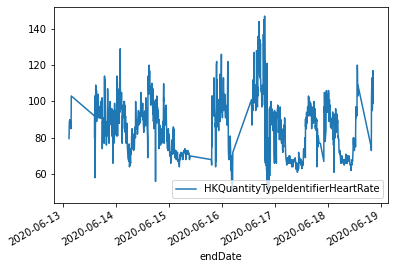

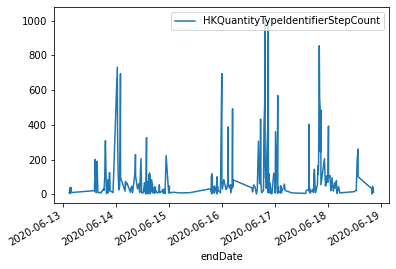

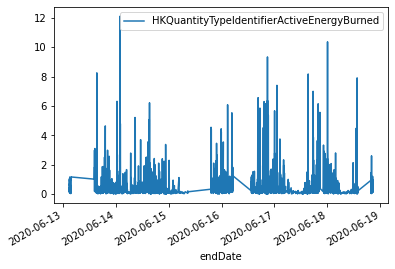

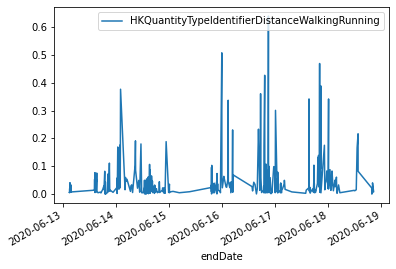

In [317]:
for type in df.type.unique():
    ydf = df[df.type == type]
    ydf.plot(x='endDate', y='value', label=type)

In [318]:
df.type.unique()


array(['HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierDistanceWalkingRunning'], dtype=object)

In [319]:
step_df = df[df.type == "HKQuantityTypeIdentifierDistanceWalkingRunning"]
step_df.describe()


,value
count,511.000000
mean,0.042916
std,0.065834
min,0.000705
25%,0.011994
50%,0.027543
75%,0.047114
max,0.638335


In [320]:
step_df = df[df.type == "HKQuantityTypeIdentifierStepCount"]
step_df.head(5)


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value
35562,HKQuantityTypeIdentifierStepCount,石井大輔のApple Watch,6.1.3,count,2020-06-13 03:01:23+09:00,2020-06-13 02:58:36+09:00,2020-06-13 02:58:43+09:00,10.0
35563,HKQuantityTypeIdentifierStepCount,石井大輔のApple Watch,6.1.3,count,2020-06-13 03:12:22+09:00,2020-06-13 03:07:53+09:00,2020-06-13 03:07:56+09:00,8.0
35564,HKQuantityTypeIdentifierStepCount,石井大輔のApple Watch,6.1.3,count,2020-06-13 03:12:22+09:00,2020-06-13 03:10:01+09:00,2020-06-13 03:10:19+09:00,29.0
35565,HKQuantityTypeIdentifierStepCount,石井大輔のApple Watch,6.1.3,count,2020-06-13 03:12:22+09:00,2020-06-13 03:11:05+09:00,2020-06-13 03:11:49+09:00,17.0
35567,HKQuantityTypeIdentifierStepCount,石井大輔のApple Watch,6.1.3,count,2020-06-13 03:25:00+09:00,2020-06-13 03:13:16+09:00,2020-06-13 03:13:18+09:00,12.0
